In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import shutil

ModuleNotFoundError: No module named 'pandas'

In [13]:
results = pd.read_csv('../runs/run1/results.csv')
admissions = pd.read_csv('/home/zzaiman/local/physionet.org/files/mimiciv/2.0/hosp/admissions.csv')
patients = pd.read_csv('/home/zzaiman/local/physionet.org/files/mimiciv/2.0/hosp/patients.csv')
icu = pd.read_csv('/home/zzaiman/local/physionet.org/files/mimiciv/2.0/icu/icustays.csv')

In [14]:
icu

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los
0,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266
1,10000980,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.497535
2,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032
3,10001217,27703517,34592300,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-12-19 15:42:24,2157-12-20 14:27:41,0.948113
4,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588
...,...,...,...,...,...,...,...,...
76938,19999442,26785317,32336619,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2148-11-19 14:23:43,2148-11-26 13:12:15,6.950370
76939,19999625,25304202,31070865,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2139-10-10 19:18:00,2139-10-11 18:21:28,0.960741
76940,19999828,25744818,36075953,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2149-01-08 18:12:00,2149-01-10 13:11:02,1.790995
76941,19999840,21033226,38978960,Trauma SICU (TSICU),Surgical Intensive Care Unit (SICU),2164-09-12 09:26:28,2164-09-17 16:35:15,5.297766


In [15]:
admissions.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0


In [16]:
admissions_demo = admissions.filter(['subject_id', 'race', 'language', 'hospital_expire_flag'], axis=1).drop_duplicates(subset='subject_id')

In [17]:
admissions_demo.shape

(190279, 4)

In [18]:
results = results.merge(admissions_demo, on='subject_id')
results = results.merge(patients, on='subject_id')

In [19]:
results.head()

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,...,pred_Pneumothorax,pred_Support Devices,race,language,hospital_expire_flag,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10032725,50331901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.054003,0.674239,BLACK/AFRICAN AMERICAN,ENGLISH,0,F,38,2143,2011 - 2013,2143-03-30
1,10032725,55504914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.051336,0.690007,BLACK/AFRICAN AMERICAN,ENGLISH,0,F,38,2143,2011 - 2013,2143-03-30
2,10046166,50051329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.019981,0.048930,WHITE,ENGLISH,0,M,67,2132,2011 - 2013,2133-11-04
3,10046166,50051329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.029504,0.123027,WHITE,ENGLISH,0,M,67,2132,2011 - 2013,2133-11-04
4,10046166,51738740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016694,0.084055,WHITE,ENGLISH,0,M,67,2132,2011 - 2013,2133-11-04


In [20]:
results['gender'].value_counts()

M    2855
F    2304
Name: gender, dtype: int64

In [21]:
results['gender'].value_counts(normalize=True)

M    0.553402
F    0.446598
Name: gender, dtype: float64

In [22]:
results['race'].value_counts()

WHITE                             3307
BLACK/AFRICAN AMERICAN             857
BLACK/CAPE VERDEAN                 151
HISPANIC OR LATINO                 143
WHITE - OTHER EUROPEAN             139
ASIAN - SOUTH EAST ASIAN           114
WHITE - EASTERN EUROPEAN            78
ASIAN - CHINESE                     76
ASIAN - ASIAN INDIAN                53
OTHER                               48
BLACK/CARIBBEAN ISLAND              38
UNKNOWN                             33
MULTIPLE RACE/ETHNICITY             25
WHITE - RUSSIAN                     17
UNABLE TO OBTAIN                    17
SOUTH AMERICAN                      16
AMERICAN INDIAN/ALASKA NATIVE       14
PORTUGUESE                          14
HISPANIC/LATINO - GUATEMALAN         8
ASIAN - KOREAN                       7
HISPANIC/LATINO - PUERTO RICAN       3
ASIAN                                1
Name: race, dtype: int64

In [23]:
results['race'].value_counts(normalize=True)

WHITE                             0.641016
BLACK/AFRICAN AMERICAN            0.166117
BLACK/CAPE VERDEAN                0.029269
HISPANIC OR LATINO                0.027719
WHITE - OTHER EUROPEAN            0.026943
ASIAN - SOUTH EAST ASIAN          0.022097
WHITE - EASTERN EUROPEAN          0.015119
ASIAN - CHINESE                   0.014732
ASIAN - ASIAN INDIAN              0.010273
OTHER                             0.009304
BLACK/CARIBBEAN ISLAND            0.007366
UNKNOWN                           0.006397
MULTIPLE RACE/ETHNICITY           0.004846
WHITE - RUSSIAN                   0.003295
UNABLE TO OBTAIN                  0.003295
SOUTH AMERICAN                    0.003101
AMERICAN INDIAN/ALASKA NATIVE     0.002714
PORTUGUESE                        0.002714
HISPANIC/LATINO - GUATEMALAN      0.001551
ASIAN - KOREAN                    0.001357
HISPANIC/LATINO - PUERTO RICAN    0.000582
ASIAN                             0.000194
Name: race, dtype: float64

In [24]:
results['anchor_age'].describe()

count    5159.000000
mean       65.586742
std        12.137213
min        29.000000
25%        58.000000
50%        65.000000
75%        74.000000
max        91.000000
Name: anchor_age, dtype: float64

(array([  67.,   64.,  232.,  480.,  622., 1442.,  750.,  626.,  470.,
         406.]),
 array([29. , 35.2, 41.4, 47.6, 53.8, 60. , 66.2, 72.4, 78.6, 84.8, 91. ]),
 <BarContainer object of 10 artists>)

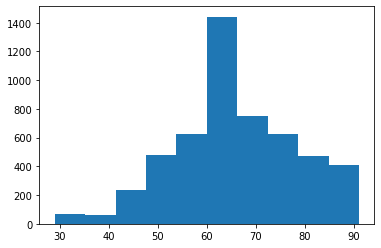

In [25]:
plt.hist(results['anchor_age'])

In [ ]:
def age_bins(age):
    pass

In [8]:
admissions['insurance'].value_counts(dropna=False)

Other       241613
Medicare    168963
Medicaid     43748
Name: insurance, dtype: int64